# Sentiment analysis on news dataset using TextBlob and Afinn Lexicon

## Dataset link : https://www.kaggle.com/asad1m9a9h6mood/news-articles/data

## The AFINN lexicon is one of the simplest and most popular lexicons that can be used extensively for sentiment analysis.
## TextBlob is an excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also has a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. 

### Including the required libraries, and reading the dataset.
### Predicting sentiments using TextBlob
### The sentiment is "positive" if the score is greater than 0, "neutral" if equal to zero and "negative" if less than 0.

In [3]:
from textblob import TextBlob
import pandas as pd

news_df = pd.read_csv("news.csv")

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['Article']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
print("Sentiment analysis statistics using TextBlob")
df = pd.DataFrame([list(news_df['NewsType']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

Sentiment analysis statistics using TextBlob


sentiment_score                                           \
                        count      mean       std    min    25%    50%   
news_category                                                            
business                920.0  0.046987  0.097260 -0.267 -0.014  0.046   
sports                 1408.0  0.113124  0.108598 -1.000  0.050  0.107   
world                   364.0  0.067016  0.094571 -0.205  0.015  0.072   

                               
                   75%    max  
news_category                  
business       0.10400  0.500  
sports         0.17000  0.800  
world          0.11625  0.396

### Plotting the sentiments

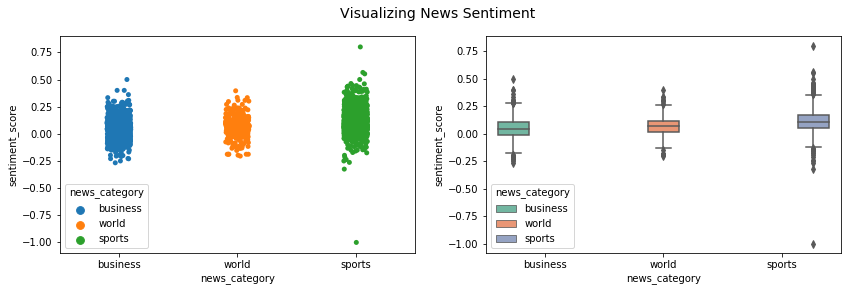

In [4]:
import matplotlib.pyplot as plt

import seaborn as sns

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

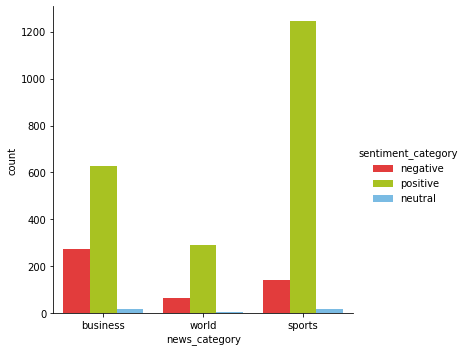

In [5]:
fc = sns.catplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

### Predicting the sentiments using Afinn analysing lexicon.

In [7]:

# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in news_df['Article']]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

# sentiment statistics per news category
print("Sentiment analysis statistics using Afinn lexicon")
df = pd.DataFrame([list(news_df['NewsType']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

Sentiment analysis statistics using Afinn lexicon


sentiment_score                                                \
                        count       mean        std   min   25%  50%    75%   
news_category                                                                 
business                920.0   6.269565  16.463074 -72.0 -3.00  4.0  12.25   
sports                 1408.0  10.089489  17.100288 -73.0  0.00  7.0  18.00   
world                   364.0  10.431319  17.912343 -60.0  1.75  8.0  17.00   

                     
                max  
news_category        
business       88.0  
sports         91.0  
world          84.0

In [8]:
actualResults = news_df['Classification']
print(actualResults)

0       negative
1       positive
2       positive
3       negative
4       negative
          ...   
2687    negative
2688    positive
2689    negative
2690    positive
2691    positive
Name: Classification, Length: 2692, dtype: object


## Creating confusion matrix of actual sentiment values versus predicted sentiments.
## Finding the accuracy of the model and displaying the report inlcuding precision and recall.

### Accuracy = (TP + TN) / (TP + TN + FP + FN)
### Precision = TP / (TP + FP)
### Recall = TP / (TP + FN)



#### Comparison using Afinn lexicon generated values


[[ 681    0    0]
 [   0  103    0]
 [   0    0 1908]]


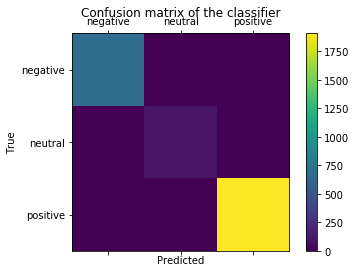

Accuracy Score :
1.0
Report : 
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       681
     neutral       1.00      1.00      1.00       103
    positive       1.00      1.00      1.00      1908

    accuracy                           1.00      2692
   macro avg       1.00      1.00      1.00      2692
weighted avg       1.00      1.00      1.00      2692



In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

labels = ['negative', 'neutral', 'positive']
cm_afinn = confusion_matrix(actualResults, sentiment_category,labels )
print(cm_afinn)
fig_a = plt.figure()
ax_a = fig_a.add_subplot(111)
cax_a = ax_a.matshow(cm_afinn)
plt.title('Confusion matrix of the classifier')
fig_a.colorbar(cax_a)
ax_a.set_xticklabels([''] + labels)
ax_a.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('Accuracy Score :')
print(accuracy_score(actualResults, sentiment_category))
print ('Report : ')
print (classification_report(actualResults, sentiment_category))

#### Comparison using TextBlob generated values

[[ 285    7  389]
 [  30    4   69]
 [ 169   34 1705]]


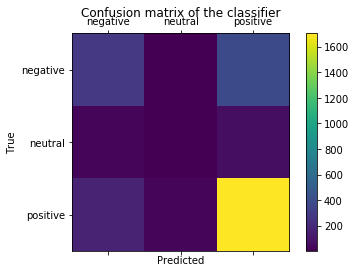

Accuracy Score :
0.7407132243684993
Report : 
              precision    recall  f1-score   support

    negative       0.59      0.42      0.49       681
     neutral       0.09      0.04      0.05       103
    positive       0.79      0.89      0.84      1908

    accuracy                           0.74      2692
   macro avg       0.49      0.45      0.46      2692
weighted avg       0.71      0.74      0.72      2692



In [12]:

cm = confusion_matrix(actualResults, sentiment_category_tb,labels )
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('Accuracy Score :')
print(accuracy_score(actualResults, sentiment_category_tb))
print ('Report : ')
print (classification_report(actualResults, sentiment_category_tb))

#### REFERENCES:
##### https://blog.lftechnology.com/predicting-sentiment-on-news-data-45c5c22ec2e3
##### https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
##### https://github.com/fnielsen/afinn